In [28]:
import pandas as pd
df = pd.read_csv('epl_dataset.csv')
df.head()

,Season,home_team,away_team,home_goals,away_goals,result
0,1993-94,Arsenal,Coventry,0,3,A
1,1993-94,Aston Villa,QPR,4,1,H
2,1993-94,Chelsea,Blackburn,1,2,A
3,1993-94,Liverpool,Sheffield Weds,2,0,H
4,1993-94,Man City,Leeds,1,1,D


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Season      11113 non-null  object
 1   home_team   11113 non-null  object
 2   away_team   11113 non-null  object
 3   home_goals  11113 non-null  int64 
 4   away_goals  11113 non-null  int64 
 5   result      11113 non-null  object
dtypes: int64(2), object(4)
memory usage: 521.1+ KB


### Replace invalid values from the season column  (? -> 'Unknown season')

In [30]:
df.loc[df['Season'] == '?', 'Season'] = 'Unknown Season'

### Identify invalid values in goals scored

Analyze the columns home_goals and remove rows with invalid values
Hint: Use a visualization to help you in the process!

<Axes: >

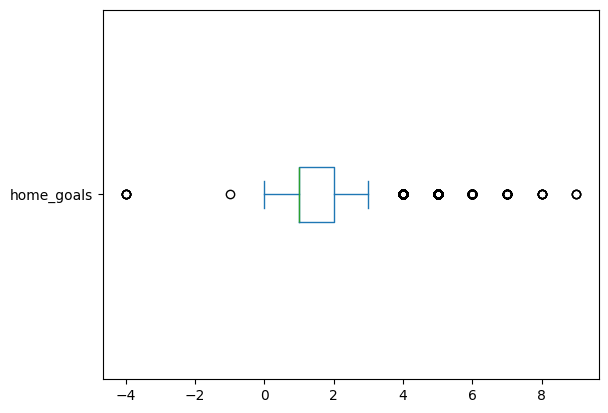

In [32]:
df['home_goals'].plot(kind='box', vert = False)    # there are some negative values. Goals should be >= 0

In [33]:
df[df['home_goals'] < 0]

,Season,home_team,away_team,home_goals,away_goals,result
12,1993-94,Everton,Man City,-1,0,H
1777,1997-98,Liverpool,Chelsea,-4,2,H
1785,1997-98,Leeds,Newcastle,-4,1,H
1791,1997-98,Liverpool,Derby,-4,0,H
1813,1997-98,Liverpool,Tottenham,-4,0,H
1832,1997-98,Chelsea,Derby,-4,0,H
1965,1997-98,Leeds,Blackburn,-4,0,H


In [34]:
df = df[df['home_goals'] >= 0]

df[df['home_goals'] < 0]

,Season,home_team,away_team,home_goals,away_goals,result


In [35]:
df['result'].value_counts()

result
H    5081
A    3161
D    2864
Name: count, dtype: int64

### Identify and clean invalid results in the result column

In [38]:
df.loc[df['home_goals'] > df['away_goals'], 'result'] = 'H'
df.loc[df['home_goals'] < df['away_goals'], 'result'] = 'A'
df.loc[df['home_goals'] == df['away_goals'], 'result'] = 'D'

### Calculate average goals per season

In [45]:
df['Total_Goals'] = df['home_goals'] + df['away_goals']	

df.groupby('Season')['Total_Goals'].mean().head()

Season
1993-94    2.590022
1994-95    2.586580
1995-96    2.600000
1996-97    2.552632
1997-98    2.652406
Name: Total_Goals, dtype: float64

### What's the biggest goal difference in a match?

In [46]:
(df['home_goals'] - df['away_goals']).abs().max()

np.int64(9)

### What's the team with most away wins?

In [54]:
away_wins = df[df['result'] == 'A']

away_wins['away_team'].value_counts().idxmax()

'Man United'

In [66]:
# or
df[df['result'] == 'A'].groupby('away_team')['result'].count().idxmax()

'Man United'

### What's the team with the most goals scored at home?

In [56]:
home_goals = df.groupby('home_team')['home_goals'].sum().sort_values(ascending=False)
home_goals.head(5)

home_team
Man United    1168
Arsenal       1119
Liverpool     1093
Chelsea       1080
Tottenham      948
Name: home_goals, dtype: int64

### What's the team that received the least amount of goals while playing at home?

This is a tricky activity, because we're not looking for the "total" of goals received, but the "ratio" of received goals / played goals.

In [76]:
df[['home_team', 'away_goals']].groupby('home_team').mean().sort_values(by='away_goals').head(5)

,away_goals
home_team,
Man United,0.744565
Liverpool,0.795620
Chelsea,0.828780
Arsenal,0.844203
Man City,0.942982


In [ ]:
# or
df.groupby('home_team').apply(lambda rows: rows['away_goals'].sum() / rows['result'].count()).sort_values().head()

C:\Users\User\AppData\Local\Temp\ipykernel_9228\1330593079.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('home_team').apply(lambda rows: rows['away_goals'].sum() / rows['result'].count()).sort_values().head()


home_team
Man United    0.744565
Liverpool     0.795620
Chelsea       0.828780
Arsenal       0.844203
Man City      0.942982
dtype: float64

In [83]:
# or
away_goals_df = df.groupby('home_team')[['result', 'away_goals']].agg(
    {'result': 'count', 'away_goals': 'sum'}
).sort_values(
    by=['result', 'away_goals'], ascending=[False, True]
).rename(columns={'result': 'games_played', 'away_goals': 'goals_received'})

away_goals_df['ratio'] = away_goals_df['goals_received'] / away_goals_df['games_played']
away_goals_df.head(5)

,games_played,goals_received,ratio
home_team,,,
Man United,552,411,0.744565
Arsenal,552,466,0.844203
Tottenham,551,591,1.072595
Everton,550,607,1.103636
Chelsea,549,455,0.828780
